In [104]:
import matplotlib.pyplot as plt
import re
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
p = re.compile('[0-9]')

|Zone|Intensity|Percentage of HRmax|
|:-:|:-:|:-:|
|Zone 1|Very light|50–60%|
|Zone 2|Light|60–70%|
|Zone 3|Moderate|70–80%|
|Zone 4|Hard|80–90%|

In [97]:
d = re.compile('\d\d\d\d-\d\d-\d\d')

In [129]:
def add(zone_dict, zone):
    zone = str(zone)
    if zone in zone_dict.keys():
        count = zone_dict.get(zone) + 1
    else:
        count = 1
    zone_dict[zone]  = count
    return zone_dict
    
def plot_hrzone(filename):

    hr = []

#     with open('./data/4013674297.gpx', 'rb') as f:
    day = str()
    with open(filename, 'rb') as f:
        lines = f.readlines()

        for i, l in enumerate(lines):
            line = l.decode()
            if "<time>" in line and "</time>" in line and len(day) == 0:
                day = line[d.search(line).start():d.search(line).end()]

            if "<gpxtpx:hr>" in line and "</gpxtpx:hr>" in line:
                hr.append(int(''.join(p.findall(line))))



    hr_max = 185

    zone_dict = dict()

    for i, h in enumerate(hr):
        if h > hr_max * .9:
            zone_dict = add(zone_dict, 5)
        elif h > hr_max * .8:
            zone_dict = add(zone_dict, 4)
        elif h > hr_max * .7:
            zone_dict = add(zone_dict, 3)
        elif h > hr_max * .6:
            zone_dict = add(zone_dict, 2)
        elif h > hr_max * .5:
            zone_dict = add(zone_dict, 1)
        else:
            zone_dict = add(zone_dict, 0)

    for k, v in zone_dict.items():
        zone_dict[k] = (zone_dict.get(k)/len(hr)) * 100

    x, height = [], []

    plt.figure(figsize=(10,5), dpi=60)
    for i in range(6):
        x.append(f"[{hr_max*(i+4)/10:0.0f} ~ {hr_max*(i+5)/10:0.0f}]")
        height.append(zone_dict.get(str(i)))
        
    sns.barplot(x, height)
    plt.ylabel("%")
    plt.xlabel(f"heart rate zones")
    plt.title(f"{day}, mean={np.mean(hr):0.0f}, max={max(hr)}")
    plt.ylim(0,100)
    plt.show()

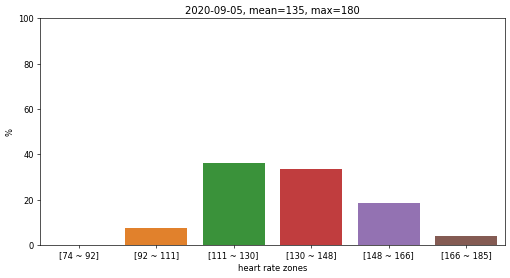

In [130]:
plot_hrzone('./data/4013674297.gpx')

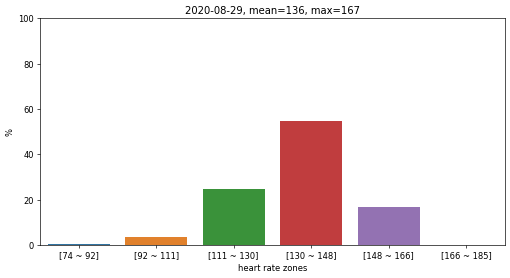

In [131]:
plot_hrzone('./data/3984541086.gpx')

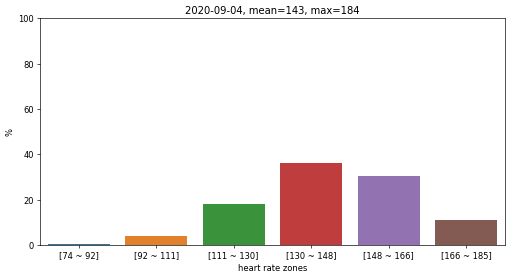

In [132]:
plot_hrzone('./data/4008674679.gpx')